# 🎯 Stacking and Blending Ensembles

---

## 📚 **Core Concept**
**Meta-learning approaches** that combine multiple base models using a **meta-model** to learn optimal weights/combinations.

---

## 🔄 **Stacking (Stacked Generalization)**

### **Algorithm Flow:**
1. **Level-0**: Train base models on training data
2. **Meta-features**: Generate predictions using cross-validation
3. **Level-1**: Train meta-model on meta-features
4. **Final**: Meta-model combines base predictions

### **Mathematical Framework:**
Given base models $f_1, f_2, ..., f_k$ and meta-model $g$:

$$\hat{y} = g(f_1(x), f_2(x), ..., f_k(x))$$

### **Cross-Validation Strategy:**
```python
# K-fold CV to avoid overfitting
for fold in range(k_folds):
    # Train base models on k-1 folds
    # Predict on held-out fold
    # Stack predictions as meta-features
```

---

## 🎭 **Blending**

### **Key Difference:**
- **Stacking**: Uses CV to create meta-features
- **Blending**: Uses **holdout validation set**

### **Process:**
1. Split data: Train + Holdout
2. Train base models on training set
3. Generate predictions on holdout set
4. Train meta-model on holdout predictions
5. Final predictions: weighted combination

### **Weight Learning:**
$$w^* = \arg\min_w \sum_{i=1}^n L(y_i, \sum_{j=1}^k w_j f_j(x_i))$$

---

## ⚖️ **Comparison Table**

| Aspect | Stacking | Blending |
|--------|----------|----------|
| **Data Usage** | Cross-validation | Holdout set |
| **Complexity** | Higher | Lower |
| **Data Efficiency** | Better | Less efficient |
| **Overfitting Risk** | Lower | Higher |
| **Computation** | More expensive | Faster |

---

## 💡 **Best Practices**

### **Base Model Selection:**
- Use **diverse models** (different algorithms/hyperparameters)
- Ensure models are **uncorrelated**
- Include both **high-bias** and **high-variance** models

### **Meta-Model Choice:**
- **Linear models**: Simple, interpretable weights
- **Tree models**: Capture non-linear combinations
- **Neural networks**: Complex feature interactions

### **Avoiding Overfitting:**
```python
# Stacking: Use stratified K-fold
from sklearn.model_selection import StratifiedKFold
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Blending: Use separate validation set (20-30%)
train_blend, val_blend = train_test_split(train, test_size=0.3)
```

---

## 🔧 **Implementation Pattern**

```python
# Pseudo-code for Stacking
class StackingEnsemble:
    def __init__(self, base_models, meta_model):
        self.base_models = base_models
        self.meta_model = meta_model
    
    def fit(self, X, y):
        # Generate meta-features via CV
        meta_features = self._get_meta_features(X, y)
        # Train meta-model
        self.meta_model.fit(meta_features, y)
    
    def predict(self, X):
        # Get base predictions
        base_preds = [model.predict(X) for model in self.base_models]
        # Stack and predict with meta-model
        return self.meta_model.predict(np.column_stack(base_preds))
```

---

## 🎯 **When to Use**

✅ **Good for:**
- Competition settings (Kaggle)
- When you have diverse strong models
- Sufficient computational resources
- Need maximum performance

❌ **Avoid when:**
- Limited data (< 1000 samples)
- Time/resource constraints
- Interpretability is crucial
- Base models are highly correlated

---

## 📈 **Performance Gains**
Typical improvements: **0.5-2%** accuracy boost
*"The last mile of model performance"*

## Stacking

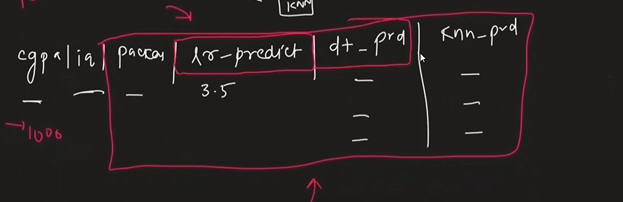

We first train our base models on the data and then make columns with their predicitions after giving the data as input. We then take the target variable and the base model predictions and make that the new training data and train the meta-model on it

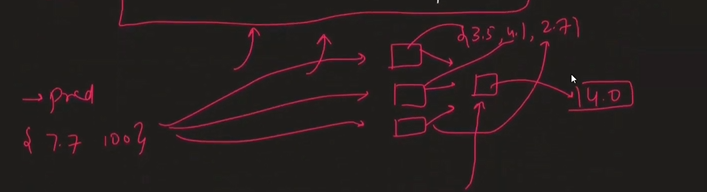

# 🧠 Stacking vs Bagging vs Boosting

---

## 🔹 Overview

| Technique    | Purpose                               | Models Trained | Combiner                                    | Key Idea                                  |
| ------------ | ------------------------------------- | -------------- | ------------------------------------------- | ----------------------------------------- |
| **Bagging**  | Reduce variance                       | In parallel    | Voting (classifier) / averaging (regressor) | Train on bootstrapped samples             |
| **Boosting** | Reduce bias                           | Sequentially   | Weighted vote / sum                         | Focus on correcting previous mistakes     |
| **Stacking** | Improve performance via meta-learning | In parallel    | Meta-learner                                | Combine diverse model outputs as features |

---

## 🎺 1. Bagging (Bootstrap Aggregating)

### 🔹 Concept:

* Multiple models are trained independently **in parallel**
* Each model gets a **random subset** of data (sampled **with replacement**) → *bootstrapping*
* Final prediction is **majority vote** (classification) or **average** (regression)

### 🧠 Examples:

* Random Forest = Decision Trees + Bagging
* Helps with **high variance** models like decision trees

### 🔹 Equation:

```math
\hat{f}_{\text{bag}}(x) = \frac{1}{M} \sum_{m=1}^M \hat{f}_m(x)
```

---

## 🎺 2. Boosting

### 🔹 Concept:

* Models are trained **sequentially**
* Each new model tries to **correct the errors** made by the previous ones
* Final output is a **weighted sum** of all models

### 🧠 Key:

* Focuses more on **bias reduction**
* Examples: AdaBoost, Gradient Boosting, XGBoost, LightGBM

### 🔹 Gradient Boosting Equation:

```math
F_m(x) = F_{m-1}(x) + \gamma_m h_m(x)
```

Where:

* $F_m(x)$: boosted model after m steps
* $h_m(x)$: weak learner at step m
* $\gamma_m$: step size (learning rate)

---

## 🎺 3. Stacking (Stacked Generalization)

### 🔹 Concept:

* Train multiple **base learners** (can be different models)
* Combine their predictions using a **meta-model** (meta-learner)
* Meta-model learns to optimally combine the base outputs

### 🧠 Process:

1. Split data into training + hold-out
2. Train base models on training set
3. Predict on hold-out set to get base predictions
4. Train meta-model on these predictions

### 🔹 Output Equation:

```math
\hat{y} = g(\hat{f}_1(x), \hat{f}_2(x), ..., \hat{f}_M(x))
```

Where $g$ is the meta-learner.

### 🔹 Example:

* Base models: SVM, Random Forest, KNN
* Meta-model: Logistic Regression


One problem with stacking is that there is potential for overfitting due to training the meta learner on the same data

To reduce this problem, we do holdout method or k-fold method


# 🧠 Hold-Out Method vs K-Fold Cross Validation

---

## 🔹 Purpose

Both methods are used to estimate a model's ability to **generalize** to unseen data by splitting the dataset into **training** and **validation** sets.

---

## 🔸 Hold-Out Method

### 🔹 Concept

- The dataset is split **once** into:
  - **Training set** (e.g., 70–80%)
  - **Validation set** (e.g., 20–30%)
- The model is trained on the training set and evaluated on the validation set.

### 🔹 Advantages

- **Fast and simple** to implement
- Good when you have **very large datasets**

### 🔸 Disadvantages

- **High variance**: performance can depend heavily on how the data is split
- Risk of **overfitting** to validation set if reused

### 🔸 Visualization

```
Full Dataset ─────► Train (80%) + Validation (20%)
```

---

## 🔸 K-Fold Cross Validation

### 🔹 Concept

- The dataset is divided into **k equal-sized folds**
- Perform **k training rounds**:
  - Each time, use **k - 1 folds** for training
  - Use the **remaining fold** for validation
- Final score is the **average** of validation scores across k rounds

### 🔹 Advantages

- Reduces variance by averaging across multiple splits
- More reliable performance estimation

### 🔸 Disadvantages

- More **computationally expensive** than hold-out

### 🔸 Visualization (k = 5):

```
Round 1: [V] Fold1, Train: Fold2–5
Round 2: [V] Fold2, Train: Fold1,3–5
...
Round 5: [V] Fold5, Train: Fold1–4
```

### 🔸 Formula

```math
	ext{CV Error} = rac{1}{k} \sum_{i=1}^{k} 	ext{Error}_i
```

---

## 🔹 Summary Table

| Feature         | Hold-Out Method     | K-Fold Cross Validation |
|----------------|---------------------|--------------------------|
| # of Splits     | 1                   | k                        |
| Speed           | Fast                | Slower (k trainings)     |
| Variance        | High                | Low                      |
| Reliability     | Low                 | High                     |
| Use Case        | Large Datasets      | Smaller / Medium datasets|

---

## 🧠 Tip
Use **K-Fold** when model evaluation needs to be **robust**, and **Hold-Out** when you have **plenty of data** and want speed.


Hold out method is called blending and k-fold approach when used is called stacking


In k-folds, we split the dataset into k-equal parts. We pick (k-1) parts and train the model on that. We then take the model and predict it on the part that wasn't trained

Then, we retrain the models and we get the base models

## Multi-Layer Stacking

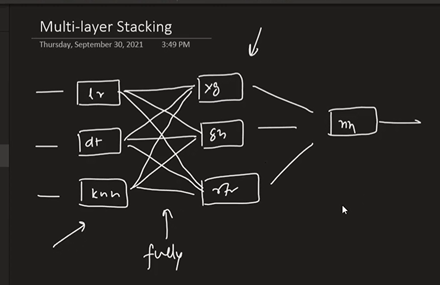

## 🧠 What is K-Fold Cross Validation?

K-Fold Cross Validation is a **resampling technique** used to evaluate machine learning models. It gives a **more reliable estimate** of model performance than a single train-test split.

---

## 🔹 Step-by-Step Explanation

Assume you have a dataset of **100 samples**, and you choose **k = 5** (i.e., 5-Fold CV):

### 1. **Split the Data**

* Divide your data into **5 equal parts** (folds), each with 20 samples.

```text
Fold 1 | Fold 2 | Fold 3 | Fold 4 | Fold 5
```

### 2. **Train and Validate in Rounds**

You run the training process **5 times**, each time using:

* **4 folds for training**
* **1 fold for validation**

| Round | Train on      | Validate on |
| ----- | ------------- | ----------- |
| 1     | Folds 2,3,4,5 | Fold 1      |
| 2     | Folds 1,3,4,5 | Fold 2      |
| 3     | Folds 1,2,4,5 | Fold 3      |
| 4     | Folds 1,2,3,5 | Fold 4      |
| 5     | Folds 1,2,3,4 | Fold 5      |

After each round, record the **validation accuracy (or error)**.

### 3. **Average the Scores**

```math
\text{Final Score} = \frac{1}{k} \sum_{i=1}^{k} \text{ValidationScore}_i
```

This gives a **stable estimate** of how the model will perform on unseen data.

---

## 🔸 Why Use K-Fold?

✅ **Reduces variance** in performance estimate
✅ Ensures **every sample** is used for both training and validation
✅ Helps avoid the **"bad luck"** of an unlucky hold-out split

---

## 🔹 Example in Code (Scikit-Learn)

```python
from sklearn.model_selection import KFold, cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import load_iris

X, y = load_iris(return_X_y=True)
model = RandomForestClassifier()

kf = KFold(n_splits=5, shuffle=True, random_state=42)
scores = cross_val_score(model, X, y, cv=kf)

print("Validation Scores:", scores)
print("Average Score:", scores.mean())
```

---

## 🔸 Tips

* Use **`shuffle=True`** if your data has any order (e.g., sorted labels).
* For **imbalanced classification**, prefer **StratifiedKFold** (preserves class distribution).
* Common values of k: `5` or `10`

---




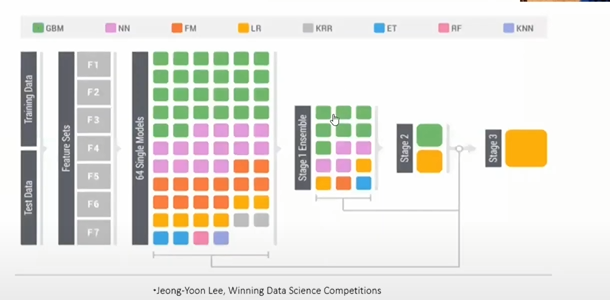